In [70]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# John's questions to answer: Do rappers talk about one candidate? Or multiple? (John)
# John's questions to answer: Do song mentions tend to correlate to how long a candidate was in the race?

In [3]:
# import the data
lyric_data = pd.read_csv("../data/HipHopLyrics.csv")
dems_2016 = pd.read_csv("../data/democrats2016.csv")
reps_2016 = pd.read_csv("../data/republicans2016.csv")
lyric_data

,id,candidate,song,artist,sentiment,theme,album_release_date,line,url
0,1,Mike Huckabee,None Shall Pass,Aesop Rock,neutral,NaN,2011,"Wither by the watering hole, Border patrol / W...",http://genius.com/Aesop-rock-none-shall-pass-l...
1,2,Mike Huckabee,Wellstone,Soul Khan,negative,NaN,2012,Might find the door but never touch the key / ...,http://genius.com/Soul-khan-wellstone-lyrics
2,3,Jeb Bush,Awe,Dez & Nobs,neutral,NaN,2006,I heard Jeb Bush looking for a (inaudible),http://genius.com/Dez-and-nobs-awe-lyrics
3,4,Jeb Bush,The Truth,Diabolic,negative,political,2006,What you heard before ain't as big of a lesson...,http://genius.com/Diabolic-the-truth-lyrics
4,5,Jeb Bush,Money Man,Gorilla Zoe,negative,personal,2007,I'm comin back from Florida / Wit Jeb Bush and...,http://genius.com/Gorilla-zoe-money-man-lyrics
5,6,Jeb Bush,Hidden Agenda,K-Rino,negative,political,2012,The Rockefeller's and the Bush family in the s...,http://genius.com/K-rino-hidden-agenda-lyrics
6,7,Jeb Bush,Bricks and Marijuana,Kase,neutral,NaN,2001,When Jeb Bush pushing life / If I tout my weapon,http://genius.com/Trick-daddy-bricks-and-marij...
7,8,Jeb Bush,Bush Song,Macklemore,negative,political,2005,"Way to go Jeb, really great strategy",http://genius.com/Macklemore-bush-song-lyrics
8,9,Jeb Bush,Shoot Me in the Head,R.A. The Rugged Man,negative,political,2013,"Obama nation, the Bushes, the Clintons or '80s...",http://genius.com/Ra-the-rugged-man-shoot-me-i...
9,10,Jeb Bush,Chamber of Fear,RZA,neutral,personal,2005,Bobby got Bush like George and Jeb,http://genius.com/Rza-chamber-of-fear-lyrics


In [4]:
#types of data in our datasets
print("Lyrics:")
print(lyric_data.dtypes)
print("")
print("Democrat poll numbers:")
print(dems_2016.dtypes)
print("")
print("Republican poll numbers")
print(reps_2016.dtypes)

Lyrics:
id                     int64
candidate             object
song                  object
artist                object
sentiment             object
theme                 object
album_release_date     int64
line                  object
url                   object
dtype: object

Democrat poll numbers:
Poll        object
Date        object
Sample      object
MoE         object
Clinton    float64
Sanders     object
Spread      object
dtype: object

Republican poll numbers
Poll      object
Date      object
Sample    object
Trump     object
Cruz      object
Kasich    object
Spread    object
dtype: object


In [5]:
print(reps_2016.describe())
print(dems_2016.describe())
# note: this data isn't being imported as numerical- we will manually have to manipulate this
# note: describe function only works for numerical data


           Poll         Date Sample Trump Cruz Kasich     Spread
count       170          170    170   170  170    170        170
unique       23          156    136    43   31     23         68
top     CNN/ORC  3/17 - 3/20     RV    --    7      2  Trump +10
freq         25            3     11    58   16     42         11
          Clinton
count  168.000000
mean    55.272619
std      7.759234
min     33.000000
25%     50.000000
50%     55.000000
75%     61.000000
max     75.000000


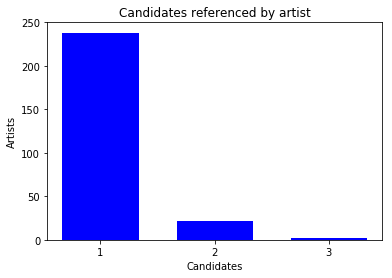

In [6]:
# question 1: Do rappers talk about one candidate? Or multiple?
# create list of unique rappers
# for each rapper, how many unique mentions of each candidate are there? (this is purely just entries)
# plotting 

# artists = lyric_data.artist.unique()
candidates_per_artist = lyric_data.groupby(['artist']).nunique('candidate')
candidates_per_artist = candidates_per_artist.groupby(['candidate']).count()['id']
# print(candidates_per_artist[['id', 'artist']])


# x = np.arrange(len(candidates_per_artist['id']))
y = candidates_per_artist
# print(x)
# print(y)

# plot = plt.bar(candidates_per_artist)
# plot.show()
N = len(y)
x = range(1,N+1)
width = 1/1.5
plt.bar(x, y, width, color="blue", tick_label = [1, 2, 3])#, title = "Number of candidates referenced per politician")
plt.xlabel("Candidates")
plt.ylabel("Artists")
plt.title("Candidates referenced by artist")
plt.show()

In [7]:
int_df = lyric_data.groupby(['artist']).nunique('candidate')
artist_list = [int_df.loc[int_df['candidate'].isin(['2','3'])].artist.index][0]
list_artists = []
for i in artist_list:
    list_artists.append(i)

print(list_artists)

['Ali', 'Apollo Brown & Ras Kass', 'Chino XL', 'Chris Webby', 'Eminem', 'Fabolous', 'Gorilla Zoe', 'Gucci Mane', 'Ice Cube', 'Jay Z', 'Jeezy', 'Lil B', 'Lil Wayne', 'Ludacris', 'Master P', 'Migos', 'Nas', 'Nicki Minaj', 'R.A. The Rugged Man', 'Rick Ross', 'Royce Da 5\'9"', 'Sheek Louch', 'The Game', 'Wax']


In [8]:
songs_frame = lyric_data[lyric_data['artist'].isin(list_artists)].groupby('song').nunique()[['candidate']]

songs_frame = songs_frame[songs_frame.candidate > 1]
# songs_frame.join(lyric_data[['song', 'artist']], on = "song") 
songs_frame["candidates_referenced"] = songs_frame['candidate']
songs_frame.drop('candidate', axis = 1)

songs_frame['song'] = songs_frame.index
final_frame = pd.merge(songs_frame, lyric_data[['song', 'artist']], on = "song") 
final_frame.drop([0, 2, 4, 6], axis = 0, inplace = True)
final_frame.drop(['candidate'], axis = 1, inplace = True)
final_frame

,candidates_referenced,song,artist
1,2,Datpiff (freeverse series Ep. 4),Chris Webby
3,2,I Shoulda Tried Harder,Wax
5,2,Money Man,Gorilla Zoe
7,2,PNT,Apollo Brown & Ras Kass


In [9]:
#some look into sentiment
sentiment_frame = lyric_data[['artist', 'sentiment', 'song','candidate']]
#sentiment_frame.groupby(['artist', 'sentiment']).agg({'song', sum})
sentiment_frame

,artist,sentiment,song,candidate
0,Aesop Rock,neutral,None Shall Pass,Mike Huckabee
1,Soul Khan,negative,Wellstone,Mike Huckabee
2,Dez & Nobs,neutral,Awe,Jeb Bush
3,Diabolic,negative,The Truth,Jeb Bush
4,Gorilla Zoe,negative,Money Man,Jeb Bush
5,K-Rino,negative,Hidden Agenda,Jeb Bush
6,Kase,neutral,Bricks and Marijuana,Jeb Bush
7,Macklemore,negative,Bush Song,Jeb Bush
8,R.A. The Rugged Man,negative,Shoot Me in the Head,Jeb Bush
9,RZA,neutral,Chamber of Fear,Jeb Bush


In [62]:
sentiment_frame[['sentiment', 'song']].groupby('sentiment').count()

,song
sentiment,
negative,71
neutral,128
positive,178


In [65]:
trump_only = sentiment_frame[['sentiment', 'song', 'candidate']][sentiment_frame.candidate == "Donald Trump"].groupby('sentiment').count()

In [66]:
no_trump = sentiment_frame[['sentiment', 'song', 'candidate']][sentiment_frame.candidate != "Donald Trump"].groupby('sentiment').count()

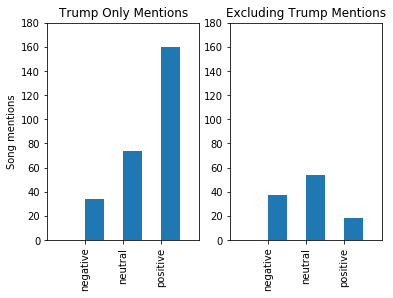

In [96]:

plt.subplot(121)
plt.bar(trump_only.index, trump_only.song, align='edge', width=0.5)
plt.title("Trump Only Mentions")
plt.xticks(rotation = "vertical")
plt.ylabel("Song mentions")
plt.axis([-1, 3, 0, 180])
plt.subplot(122)
plt.bar(no_trump.index, no_trump.song, align='edge', width=0.5)
plt.title("Excluding Trump Mentions")
plt.xticks(rotation = "vertical")
plt.axis([-1, 3, 0, 180])
plt.show()

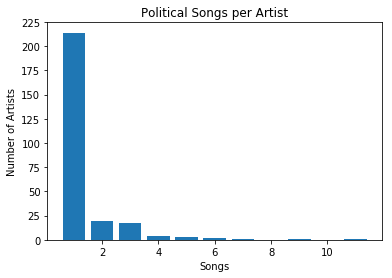

In [102]:
num_songs = sentiment_frame[['artist', 'song']].groupby('artist').nunique()
plt.bar(num_songs.groupby('song').count().index, num_songs.groupby('song').count().artist)
plt.title("Political Songs per Artist")
plt.ylabel("Number of Artists")
plt.xlabel("Songs")
plt.show()

In [107]:
int_frame = lyric_data[['artist', 'song']].groupby(['artist']).nunique()
int_frame[int_frame.song > 5]

,artist,song
artist,,
Lil Wayne,1,6
Migos,1,7
Nas,1,9
Rick Ross,1,11
Young Thug,1,6


In [111]:
lyric_data[lyric_data.artist == "Rick Ross"]

,id,candidate,song,artist,sentiment,theme,album_release_date,line,url
91,92,Hillary Clinton,White Girl (Remix),Rick Ross,positive,NaN,2007,"Hilary Clinton, she my best friend / Even co-s...",http://genius.com/Jeezy-white-girl-remix-lyrics
92,93,Hillary Clinton,Now That I'm Paid,Rick Ross,neutral,NaN,2012,Whip it in the kitchen before Hillary became a...,http://genius.com/The-game-now-that-im-paid-ly...
196,198,Donald Trump,I'm Ballin,Rick Ross,neutral,money,2009,Proceeds 'till we perceive the stunt like Dona...,http://genius.com/J-money-im-ballin-lyrics
288,290,Donald Trump,10 2 10 (Remix),Rick Ross,positive,hotel,2014,"I got a place at the Trump, just to pray for a...",http://genius.com/Big-sean-10-2-10-remix-lyrics
289,291,Donald Trump,This Is the Life,Rick Ross,positive,hotel,2008,"I'm in Trump Towers, amongst earners",http://genius.com/Rick-ross-this-is-the-life-l...
290,292,Donald Trump,I Mean It (Remix),Rick Ross,neutral,money,2014,I'm at the poker table like I'm Donald Trump,http://genius.com/G-eazy-i-mean-it-remix-lyrics
291,293,Donald Trump,Pirates,Rick Ross,positive,money,2012,"Resurrection of the real, time to get the rich...",http://genius.com/Rick-ross-pirates-lyrics
292,294,Donald Trump,Sixteen,Rick Ross,positive,hotel,2012,Trump Tower and I started with a 10 speed,http://genius.com/Rick-ross-sixteen-lyrics
293,295,Donald Trump,Think Like a Man,Rick Ross,positive,hotel,2012,"Penthouse, at the Trump, sit on Collins Ave",http://genius.com/Jennifer-hudson-think-like-a...
297,299,Donald Trump,She Wanna Fuck,Rick Ross,positive,money,2015,"Bel Air bottles like a boss, penthouse at the ...",http://genius.com/Rick-ross-she-wanna-fuck-lyrics
